<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/ComputerVision_and_CNN_with_TensorFlow_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What we're going to cover
- Getting a dataset to work with (pizza_steakD)
- Architecture of a convolutional neural network (CNN) with TensorFlow
- An end-to-end binary image classification problem
- Steps in modelling with CNNS
- Creating a CNN, compiling a model, fitting a model, evaluating a model
- An end-to-end multi-class image classification problem
- Making predictions on our own custom images

## Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car
recognizing the car in front.

### Architecture of a CNN
`Input Layer -> Convolution Layer - > Hidden Layer -> Pooling Layer -> Fully Connected Layer -> Output Layer -> Output Activation`

Visit [Tiny VGG](https://poloclub.github.io/cnn-explainer/) to understand more about CNN

In [1]:
# Shape = [None, 224, 224, 3] -> [Batch_Size, width, height, color]


### Get the Data

The images we're working with are from the Food 101 dataset (101 different classes of food): [Food-101](https://www.kaggle.com/dansbecker/food-101)

However we've modified it to only use two classes (pizza 🍕 & steak 🥩 using the image data modification notebook:
[extras-notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-26 18:01:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 173.194.198.207, 173.194.74.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2024-02-26 18:01:32 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [6]:
import os

# Walk throught pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get our class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  '''
  View a random image from a target directory and class
  '''
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


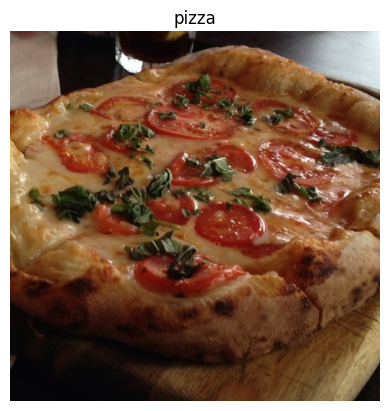

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of a different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 96,  62,  50],
        [ 94,  60,  48],
        [ 92,  58,  46],
        ...,
        [227, 241, 244],
        [226, 240, 243],
        [222, 236, 239]],

       [[ 99,  67,  54],
        [ 97,  65,  52],
        [ 93,  61,  48],
        ...,
        [231, 245, 248],
        [231, 245, 248],
        [229, 243, 246]],

       [[104,  74,  63],
        [101,  71,  60],
        [ 96,  66,  55],
        ...,
        [233, 247, 250],
        [236, 250, 253],
        [235, 249, 252]],

       ...,

       [[  7,   7,   9],
        [  7,   7,   9],
        [  6,   6,   8],
        ...,
        [ 22,  16,  16],
        [ 27,  21,  21],
        [ 30,  24,  24]],

       [[  7,   7,   9],
        [  7,   7,   9],
        [  7,   7,   9],
        ...,
        [ 20,  14,  14],
        [ 24,  18,  18],
        [ 31,  25,  25]],

       [[  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10],
        ...,
        [ 15,   9,   

In [12]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with
to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also
referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.37647059, 0.24313725, 0.19607843],
        [0.36862745, 0.23529412, 0.18823529],
        [0.36078431, 0.22745098, 0.18039216],
        ...,
        [0.89019608, 0.94509804, 0.95686275],
        [0.88627451, 0.94117647, 0.95294118],
        [0.87058824, 0.9254902 , 0.9372549 ]],

       [[0.38823529, 0.2627451 , 0.21176471],
        [0.38039216, 0.25490196, 0.20392157],
        [0.36470588, 0.23921569, 0.18823529],
        ...,
        [0.90588235, 0.96078431, 0.97254902],
        [0.90588235, 0.96078431, 0.97254902],
        [0.89803922, 0.95294118, 0.96470588]],

       [[0.40784314, 0.29019608, 0.24705882],
        [0.39607843, 0.27843137, 0.23529412],
        [0.37647059, 0.25882353, 0.21568627],
        ...,
        [0.91372549, 0.96862745, 0.98039216],
        [0.9254902 , 0.98039216, 0.99215686],
        [0.92156863, 0.97647059, 0.98823529]],

       ...,

       [[0.02745098, 0.02745098, 0.03529412],
        [0.02745098, 0.02745098, 0.03529412],
        [0.02352941, 0

## An end-to-end example

Let's build a convolutional neural networks to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/snormalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Load in the data
print("Loading data...")

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process
                                               target_size=(224, 224), # convert all images to be 224 x 224 pixels (although)
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)), # define the input shape
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"), # reduce the size of the feature map
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Loading data...
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 163ms/step - loss: 0.5789 - accuracy: 0.7000 - val_loss: 0.4455 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4641 - accuracy: 0.7967 - val_loss: 0.3785 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4303 - accuracy: 0.8127 - val_loss: 0.3472 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4005 - accuracy: 0.8320 - val_loss: 0.3665 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3312 - accuracy: 0.8733 - val_loss: 0.3371 - val_accuracy: 0.8580


> 🔑 **Note:** If the above cell is taking longer than ~10s per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have rerun some cells above).

**Understand More about Covolutional Layers, MaxPool Layers Check out the following links:**

📖**Resources:**

- [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

- [*Deep Lizard Playlist on Neural Networks*](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)

- [*Understanding Convolution Operations In Neural Networks*](https://deeplizard.com/resource/pavq7noze2)

- [*Understanding Max Pooling Operations In Neural Networks*](https://deeplizard.com/resource/pavq7noze3)


In [15]:
# Get a model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same Example as before

Let's replicate the model we've built in a previous section to
see if it works with our image data.

The model we're building is from the TensorFlow playground.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # output layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 1.3499 - accuracy: 0.5140 - val_loss: 0.7257 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6048 - accuracy: 0.6587 - val_loss: 0.5230 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5186 - accuracy: 0.7520 - val_loss: 0.4719 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4944 - accuracy: 0.7733 - val_loss: 0.5363 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4706 - accuracy: 0.7907 - val_loss: 0.5271 - val_accuracy: 0.7420


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 16)                2408464   
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2408753 (9.19 MB)
Trainable params: 2408753 (9.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Despite having 20x more parameters than our CNN model (model_1), model_2 performs poorly... let's try to improve it.**

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 2.7405 - accuracy: 0.6200 - val_loss: 0.6050 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.7417 - accuracy: 0.7400 - val_loss: 1.4964 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 1.2165 - accuracy: 0.7060 - val_loss: 1.4569 - val_accuracy: 0.6620
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6847 - accuracy: 0.7547 - val_loss: 0.5732 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.7364 - accuracy: 0.7533 - val_loss: 0.9035 - val_accuracy: 0.6640


In [19]:
# Get a summary() of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                4816928   
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4818017 (18.38 MB)
Trainable params: 4818017 (18.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is
better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Wehere a
series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of
possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.**
So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in
dechiphering between different **features** in an image.

## Binary Classification: Let's Break it down

1. Become one with the data (visualizae, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


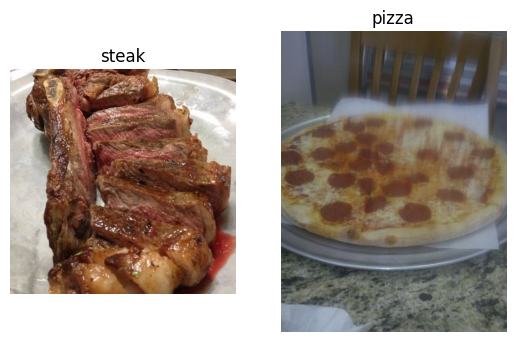

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(train_dir, "steak")
plt.subplot(1, 2, 2)
not_steak_img = view_random_image(train_dir, 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [21]:
# define the directory dataset paths
train_dir, test_dir

('pizza_steak/train/', 'pizza_steak/test/')

Our next step is to turn our data into **batches**.

A batch is a small subset of data, Rather than look at all ~20.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is good for your health...[says Yann LeCun](https://twitter.com/ylecun/status/989610208497360896?lang=en)

In [22]:
!nvidia-smi

Mon Feb 26 18:03:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              33W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # Target size of images (height, width)
                                               batch_size=32, # size of minibatches
                                               class_mode="binary", # type of data we're working with
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of train data batch
images, labels = train_data.next() # get the next batch of images/labels in the data
len(images), len(labels)


(32, 32)

In [26]:
# How many batches are there?
len(train_data)


47

In [27]:
# Get the first two images
images[:2], images[0].shape


(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
# View the first batch of labels
labels, len(labels)

(array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       dtype=float32),
 32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [30]:
# Make the creating of our model a little easier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam


In [33]:
# Create the model (this is our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # No. of sliding windows
           kernel_size=3, # filter size
           strides=1, # step size
           padding="valid", # used for prevent loss of information/preserve input shape
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 151ms/step - loss: 1.7957 - accuracy: 0.6500 - val_loss: 0.4699 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4508 - accuracy: 0.8047 - val_loss: 0.3681 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3054 - accuracy: 0.8787 - val_loss: 0.3492 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 7s 138ms/step - loss: 0.1863 - accuracy: 0.9453 - val_loss: 0.4355 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.1045 - accuracy: 0.9693 - val_loss: 0.4317 - val_accuracy: 0.8220


In [34]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compare with model_1
model_1.evaluate(test_data), model_1.summary()

16/16 [==============================] - 1s 84ms/step - loss: 0.3371 - accuracy: 0.8580
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None

([0.3371312916278839, 0.8579999804496765], None)